# COVID-19 SUPPRESSION USING A TESTING/QUARANTINE STRATEGY: A MULTI-PARADIGM SIMULATION APPROACH BASED ON A SEIRTQ COMPARTMENTAL MODEL
S. Ropert, A. Bernardin, T. Perez-Acle
## Abstract
During the current COVID-19 pandemic, non-pharmaceutical interventions represent the first-line of defense to tackle the dispersion of the disease. One of the main non-pharmaceutical interventions is testing, which consists on the application of clinical tests aiming to detect and quarantine infected people. Here, we extended the SEIR compartmental model into a SEIRTQ model, adding new states representing the testing ($T$) and quarantine ($Q$) dynamics. In doing so, we have characterized the effects of a set of testing and quarantine strategies using a multi-paradigm approach, based on ordinary differential equations and agent based modelling. Our simulations suggest that iterative testing over 10\% of the population could effectively suppress the spread of COVID-19 when testing results are delivered within 1 day. Under these conditions, a reduction of at least $95\%$ of the infected individuals can be achieved, along with a drastic reduction in the number of super-spreaders.

# SEIRTQ Model
# Agregar un diagrama del modelo y las ecuaciones



# Differential Equations

\begin{align}
\dot{S} & = -\beta \frac{S (I+T)}{N}\\
\dot{E} & = \beta \frac{S (I+T)}{N} - \frac{1}{\tau_{EI}}E \\
\dot{I} & = \frac{1}{\tau_{EI}}E - \frac{1}{\tau_{IR}} I - \kappa_{IT}\frac{I}{N}\\
\dot{R} & = \frac{1}{\tau_{IR}} I + \frac{1}{\tau_{QR}}Q \\
\dot{T} & = \kappa_{IT}\frac{I}{N} - \frac{1}{\tau_{TQ}}T \\
\dot{Q} & = \frac{1}{\tau_{TQ}}T - \frac{1}{\tau_{QR}}Q \\
\kappa_{IT} & = \kappa_{E} \kappa_{E_{acc}} \kappa_{Q} \\
\end{align}

Where:  
* $S:$ Susceptible Individuals
* $E:$ Exposed Individuals
* $I:$ Infectious Individuals
* $R:$ Removed Individuals
* $T:$ Infected waiting for their exam results
* $Q:$ Quarantined individuals
* $\beta:$ Probability of disease transmission in a contact between a susceptible and an infectious subject multiplied by the average number of contacts per person per time unit
* $N:$ Total population
* $\tau_{EI}:$ Incubation period
* $\tau_{IR}:$ Recovery time (time being infectious)
* $\tau_{TQ}:$ Test results delivery time
* $\tau_{QR}:$ Time under quarantine
* $\kappa_{E}:$ Number of tests performed per day
* $\kappa_{E_{acc}}:$ Test's accuracy
* $\kappa_{Q}:$ Proportion of the detected cases adopting an effective quarantine


In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

# cv19gm libraries
from cv19gm.cv19sim import CV19SIM

# Defining basic parameters

In [2]:

# Simulation time
t_end= 1000
# Population
population = 100000
# Initial conditions
I0 = 100 # Active infected
I_ac0 = 100 # Accumulated infected
I_d0 = 10 # New cases at day 0
R0 = 0
#
mu = 0 # E0/I0 initial

In [3]:
# Transition time between exposed and infectious
tE_I = 5.0 # 1/sigma
# Transition time between infectious and removed
tI_R = 14.0 # 1/gamma
tQ_R = 14 # Quarantine time

# Tracing and quarantines
k_Eacc = 0.9 # Exams accuracy (0-1)
k_Q = 0.9 # Effective quarantine adoption (0-1)


In [4]:
# Build configuration array. The parameters can also be added as arguments in the constructor
cfg = {'t_end':t_end,'population':population,'mu':mu,
       'tE_I':tE_I, 'tI_R':tI_R,'tQ_R':tQ_R,
       'k_Eacc':k_Eacc,'k_Q':k_Q,
       'I':I0,'I_d':I_d0,'I_ac':I_ac0,'R':R0}

In [5]:
# Transmisibility
beta = list(np.arange(0.11,0.21,0.005)) 

### Reference simulations
Building simulations without testing

In [6]:
# Define Simulations
sims_reference = CV19SIM(model='SEIRTQ',beta = list(beta),k_Ex=0,**cfg)

Using default configuration file for SEIRTQ model
20 models created


In [7]:
# Simulate
sims_reference.solve()

In [8]:
simulation_reference = sims_reference.sims #To expose the simulation results

In [9]:
# Figure parameters
plt.rcParams["figure.figsize"] = 8,6 # 38.40, 20.56 
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "sans-serif",
    "font.sans-serif":["Arial"]})

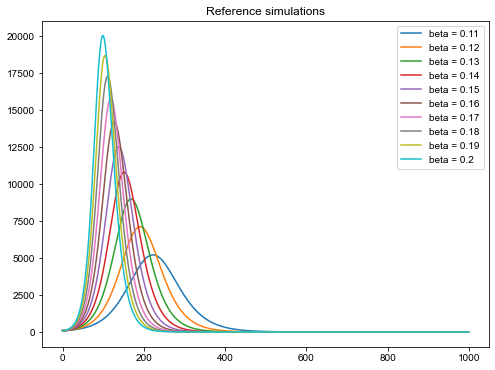

In [10]:
# Plot simulations
for sim in simulation_reference[::2]:
    plt.plot(sim.t,sim.I,label='beta = '+str(round(sim.beta(0),3)))        
plt.legend(loc=0)
plt.title('Reference simulations')
plt.show()

## Exploring testing related parameters
* Results delivery time  $\tau_{TQ}$
* Exams performed per day $\kappa_{Ex}$
* Transmisibility $\beta $

In [11]:
# Parameters to explore
tT_Q = list(np.arange(0.00001,7.50001,0.5)) # Results delivery time
k_Ex = list(np.arange(1,21,1)*population/100) # Exams performed per day


In [12]:
# Define Simulations
sims = CV19SIM(model='SEIRTQ', beta = beta, tT_Q = tT_Q,k_Ex = k_Ex,**cfg)

Using default configuration file for SEIRTQ model
6000 models created


**Warning:** Solving equations may take about 3 minutes, depending on your processor speed

In [13]:
sims.solve()

In [14]:
simulation = sims.sims # To expose simulation results

### Calculate the total infected relative to the reference simulations, i.e., those without testing campaings. 

In [15]:
totinfected = []
for i in range(len(tT_Q)):
    aux = []
    for j in range(len(k_Ex)):
        aux2 = []
        for k in range(len(beta)):        
            aux2.append(100*simulation[i,j,k].I_ac[-1]/simulation_reference[k].I_ac[-1])
            if simulation[i,j,k].I_ac[-1] >= simulation_reference[k].I_ac[-1]:
                print(i,j,k)
        aux.append(aux2)
    totinfected.append(aux)

totinfected = np.array(totinfected)

## Paper Figure 4:
**Infected vs time for different examination rates and a unique $\beta$.** Set of epidemiological curves denoting the number of SARS-CoV-2 infected individuals along the simulation time at specific testing rates and the delay in the delivery of results. Each panel corresponds to a particular percentage of tests daily applied, ranging from 1%, up to 20% of the population. On each plot, we compared the non-intervened (control) simulation (dashed black line) with that of the curves obtained by applying different delays in the delivery of results (colored lines): ranging from 0 (within 24 hours) and up to 7 days of delay.

In [16]:
# Figure parameters
plt.rcParams["figure.figsize"] = 38.40, 20.56 #8,6
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "sans-serif",
    "font.sans-serif":["Arial"]})

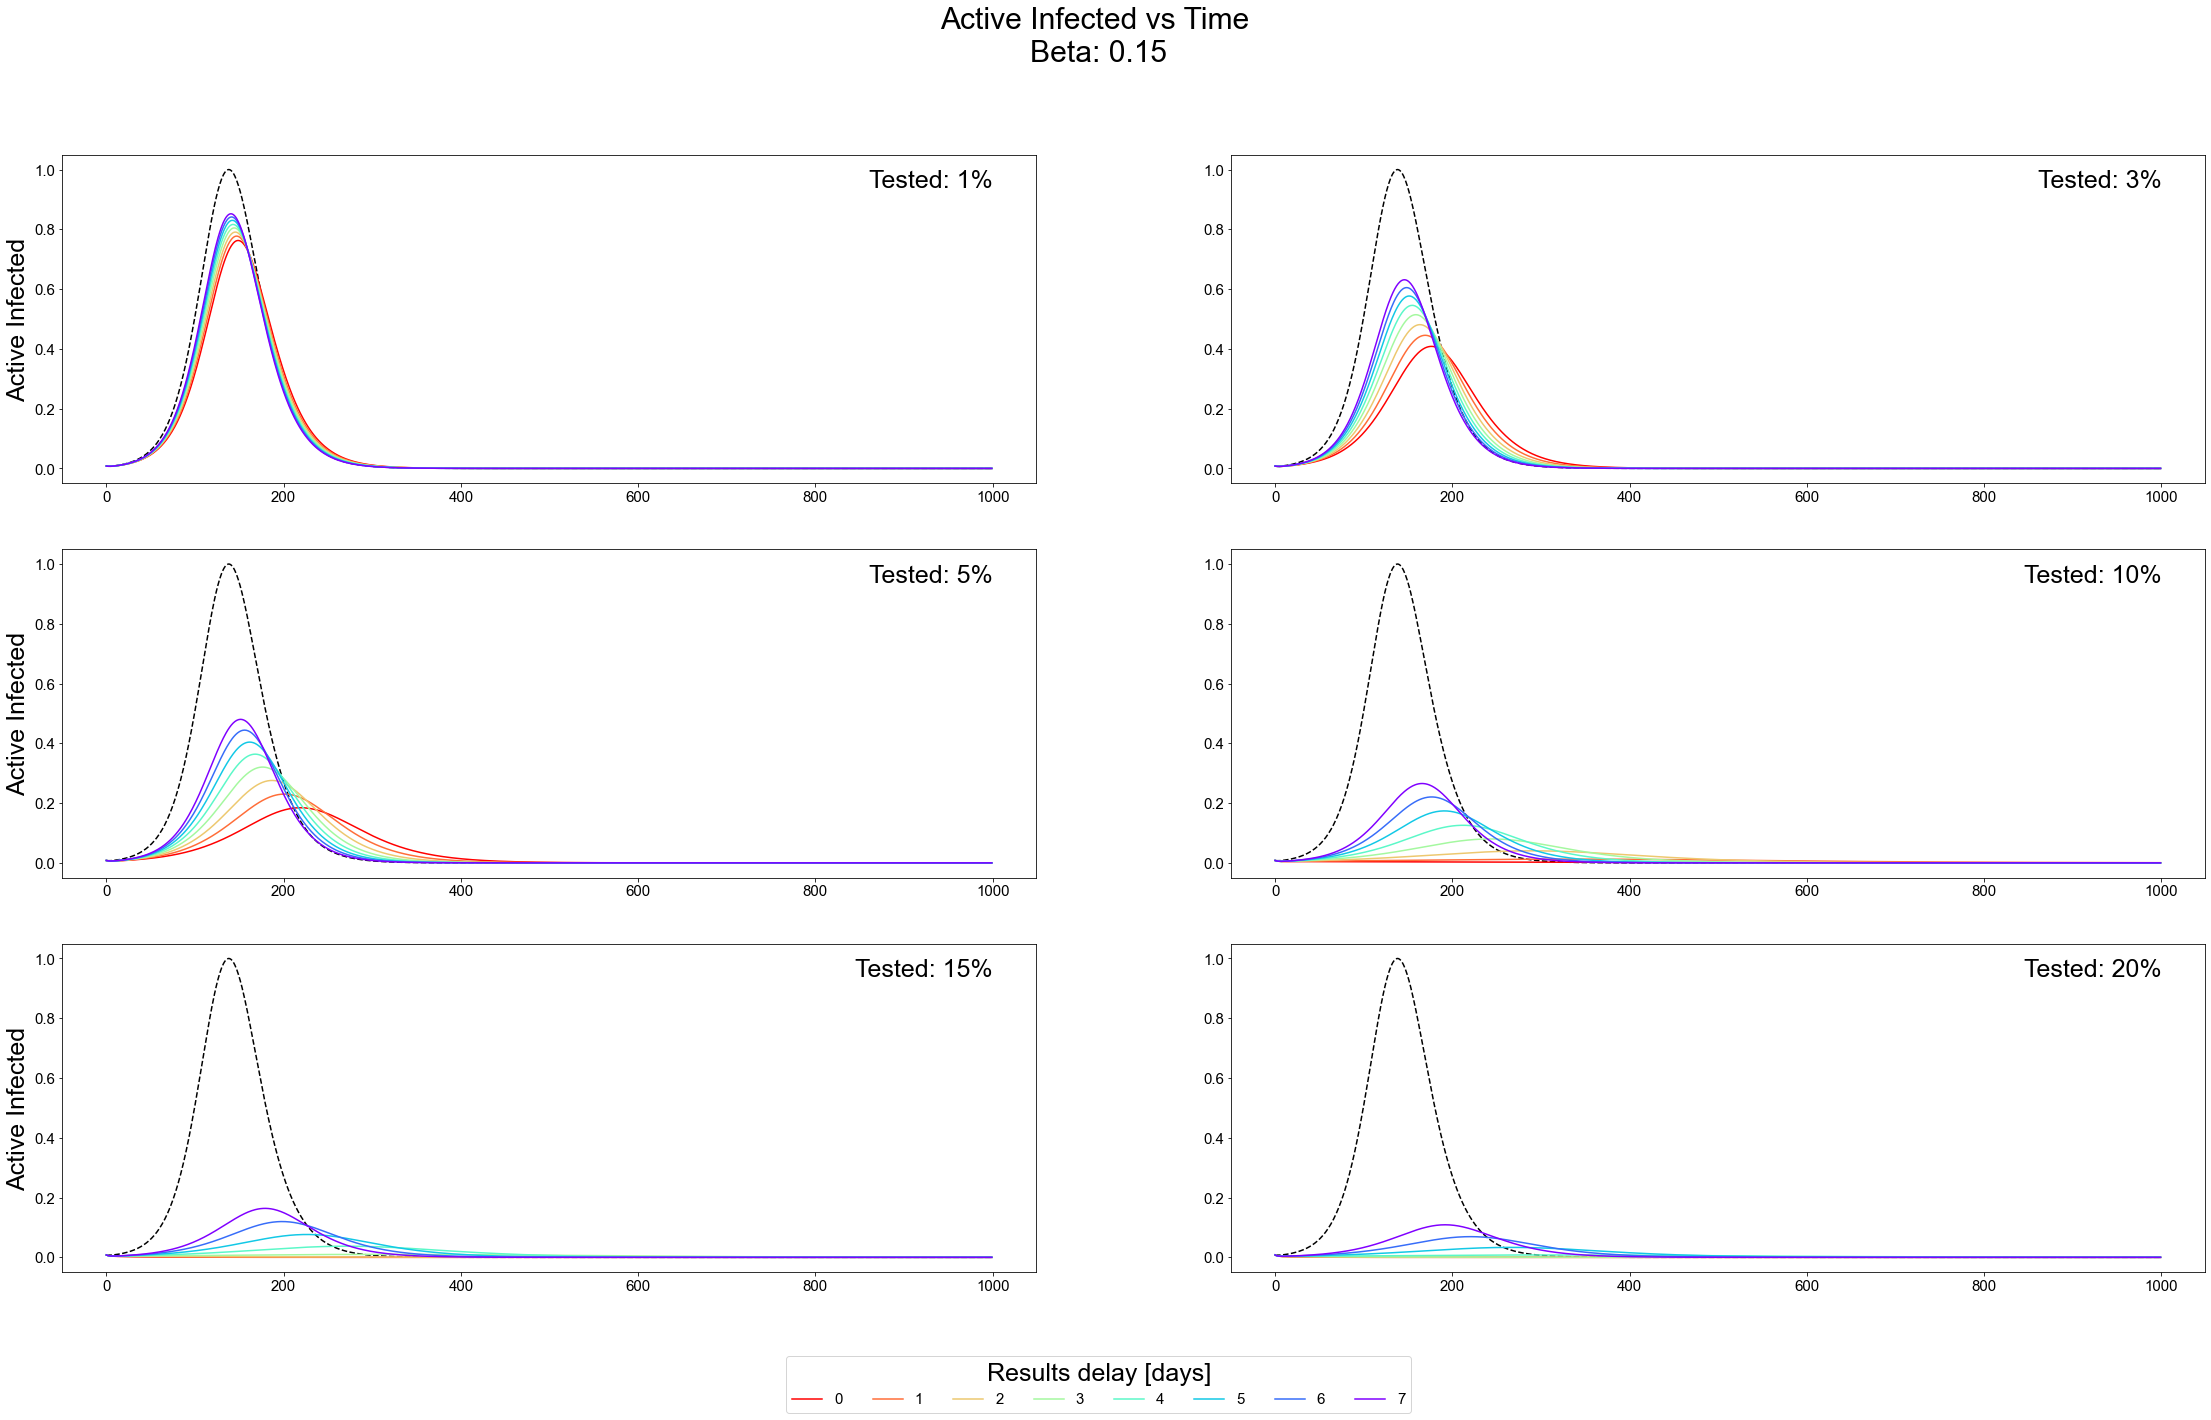

In [17]:
#  i   , j    , k
# tT_Q ,k_Ex , beta 

# User inputs
n = 2 # number of columns for multiple plot
k = 8 # Choose an element from the beta array to plot
k_Ex_values = [1,3,5,10,15,20] # Examination percentajes to be shown in the plots

k_Ex_list = [k_Ex.index(i) for i in np.array(k_Ex_values)*population/100]
colors = plt.cm.rainbow_r(np.linspace(0,1,int(len(tT_Q)/2+1)))
levels = np.arange(0,105,5)

fig, axs = plt.subplots(int(len(k_Ex_list)/n)+(int(len(k_Ex_list))%n > 0)*1, n)
for j in range(len(k_Ex_list)):
    axs[int(j/n),j%n].plot(simulation_reference[k].t,simulation_reference[k].I/np.max(simulation_reference[k].I),color = 'black',linestyle='dashed')#label='I_d No exams'
    for i in range(int(len(tT_Q)/2)+1):
        axs[int(j/n),j%n].plot(simulation[i*2,k_Ex_list[j],k].t,simulation[2*i,k_Ex_list[j],k].I/np.max(simulation_reference[k].I),color=colors[i])
        axs[int(j/n),j%n].tick_params(labelsize=15)
        if int(j/n)==4: 
            axs[int(j/n),j%n].set_xlabel('Days',size=25)
        if j%n==0:
            axs[int(j/n),j%n].set_ylabel('Active Infected',size=25)
    axs[int(j/n),j%n].text(1000, 1,'Tested: '+str(round(k_Ex[k_Ex_list[j]]/population*100))+'%', {'fontsize': 25},horizontalalignment='right',verticalalignment='top')

# Legend 
for i in range(int(len(tT_Q)/2)+1):
    axs[0,0].plot([],[],color=colors[i],label=str(int(tT_Q[i*2])))
fig.legend(loc='lower center',bbox_to_anchor=(0.5, 0.025),ncol=int(len(tT_Q)/2)+1,title = 'Results delay [days]',fontsize='15',title_fontsize='25')    
fig.suptitle("Active Infected vs Time \nBeta: "+str(round(beta[k],3)),size=30)

# To directly save the plot, uncomment the following line
#plt.savefig('plot1.pdf',dpi=100,format='pdf')

plt.show()

## Paper Figure 5: Panels A to E
**Reducing the time of results delivery while increasing the rate of testing reduces the total number of infected individuals.** (Panels A-E) Contour plots show the effect of changing the SARS-CoV-2 effective transmission rate $\beta$ and the time of the test results over the total number of individuals infected with SARS-CoV-2. We explored the effect of the SARS-CoV-2 infectivity considering the available literature (Toda2020), starting from 0.11 and up to 0.2, together with the effect of delaying the test results. To evaluate the outcome of the COVID-19 pandemic, each simulation result -i.e., the total number of infected individuals-, was normalized against the control non-intervened simulation. The normalization result appears in the spectrum, where 100% denotes the same number of total infected individuals in the simulation, compared to the control situation. (Panel F) Suppression of total infected individuals according to the percentage of daily test applied and the delay in the delivery of results. Each plotted curve corresponds to the S95 contours of the simulations with the infectivity parameters used for panels A to E. As the effective transmission rate and the delay in the delivery of results increase, the percentage of daily tests required to maintain the 95% limit, increases.

In [18]:
saveplot = False

In [19]:
plt.rcParams["figure.figsize"] = 38.40, 20.56 #8,6
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "sans-serif",
    "font.sans-serif":["Arial"]})

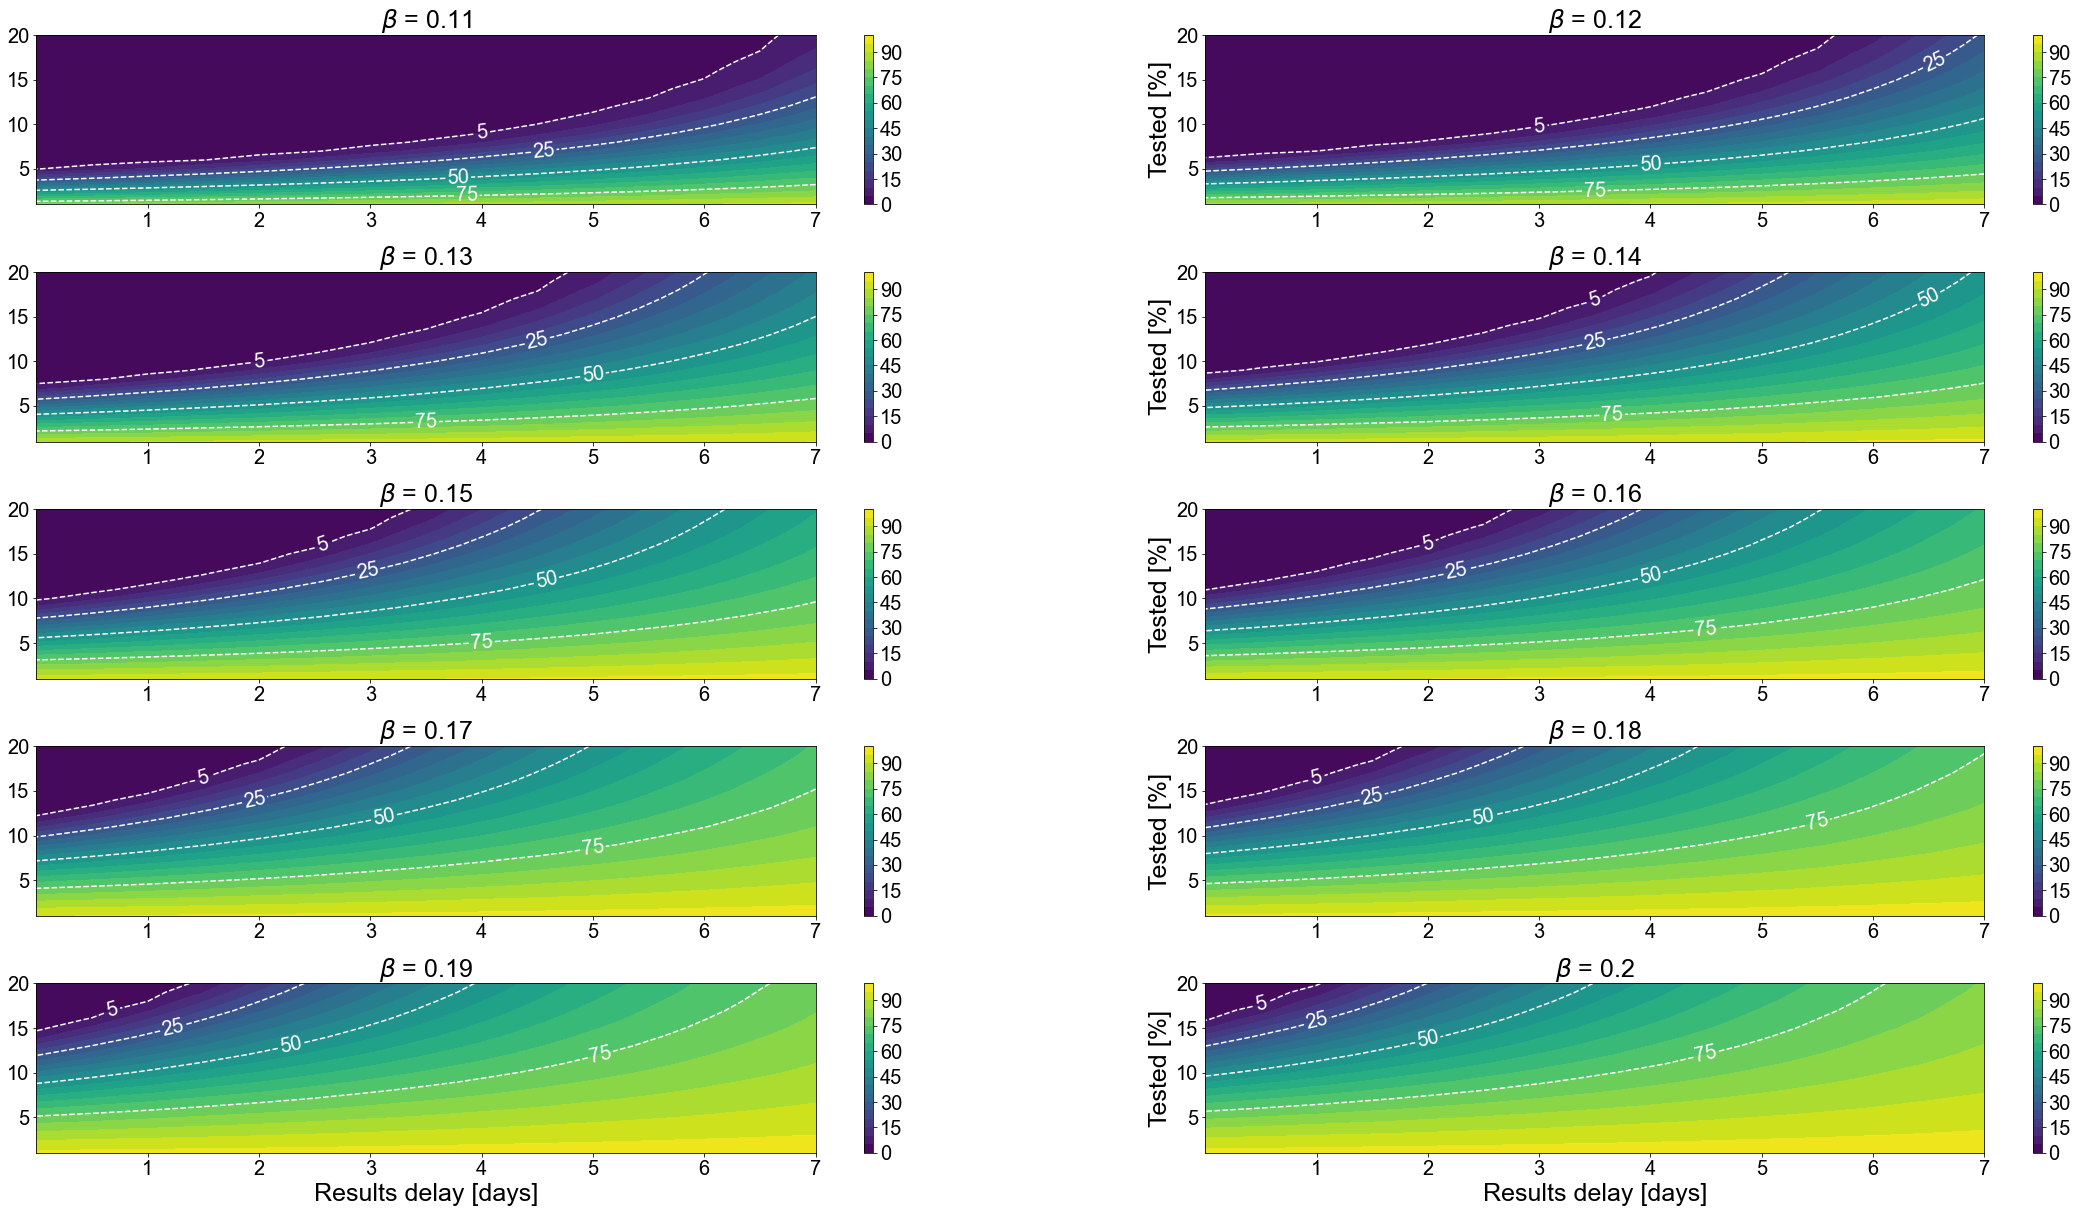

In [20]:
# Contour Plot
levels = np.arange(0,105,5)

levelcourves = [5,25,50,75]
#levelcourves = []
n = 2

fig,ax=plt.subplots(5,2)
for k in range(int(len(beta)/2)):    
    cp = ax[int(k/n),k%n].contourf(tT_Q,np.array(k_Ex)*100/population,totinfected[:,:,2*k].transpose(),levels)     
    for l in levelcourves:
        cp2 = ax[int(k/n),k%n].contour(tT_Q,np.array(k_Ex)*100/population,totinfected[:,:,2*k].transpose(),[0,l,100],colors='white',linestyles='dashed')
        ax[int(k/n),k%n].clabel(cp2, inline=1, fontsize=20,fmt=str(l))
    ax[int(k/n),k%n].set_title(r'$\beta$ = '+str(round(beta[k*2],2)),fontsize=25)
    ax[int(k/n),k%n].tick_params(labelsize=20)
    if int(k/n)==4: 
        ax[int(k/n),k%n].set_xlabel('Results delay [days]',size=25)        
    if k%n==0:
        ax[int(k/n),j%n].set_ylabel('Tested [%]',size=25)
    
    cbar = fig.colorbar(cp, ax=ax[int(k/n),k%n]) # increase fontsize
    cbar.ax.tick_params(labelsize=20)
    
#fig.suptitle('Total infected proportion to the dynamic with no exams')
#plt.tight_layout()
plt.subplots_adjust(hspace=0.4)

if saveplot:
    plt.savefig('plot2.pdf',dpi=100,format='pdf')
 
#fig.colorbar(cp) # Add a colorbar to a plot
#fig.colorbar(cp, ax=ax)

plt.show()


#### Contour plots in independent plots

In [21]:
plt.rcParams["figure.figsize"] = 8,6 # 38.40, 20.56 
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "sans-serif",
    "font.sans-serif":["Arial"]})

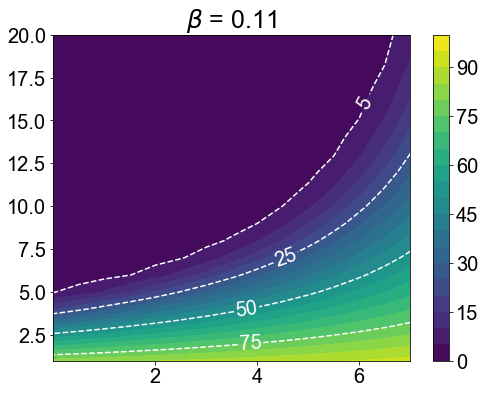

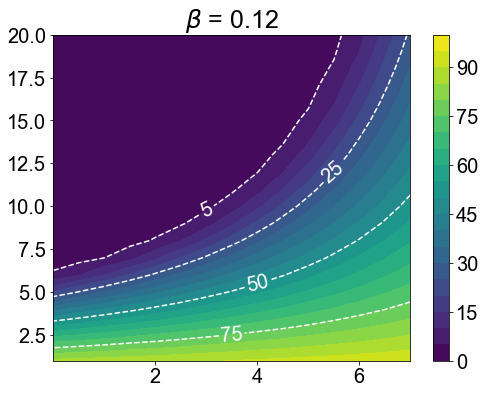

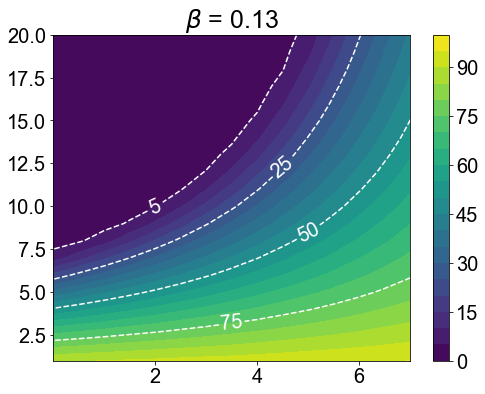

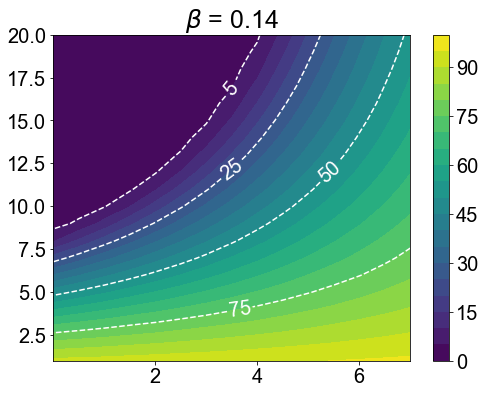

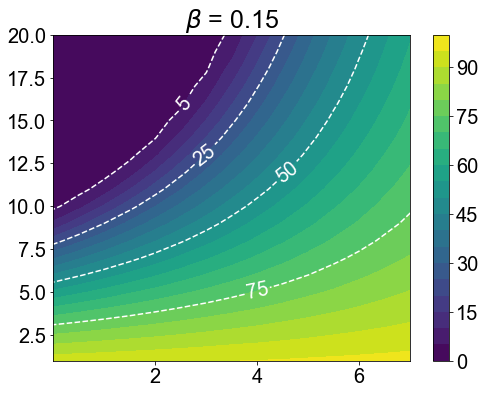

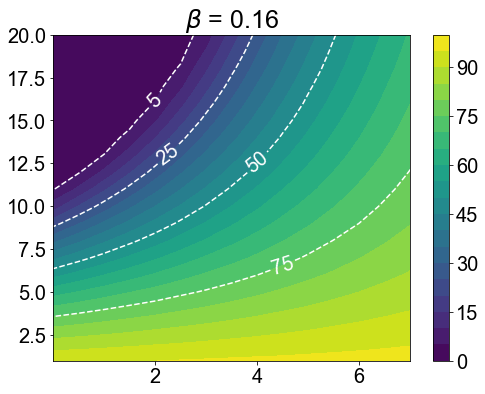

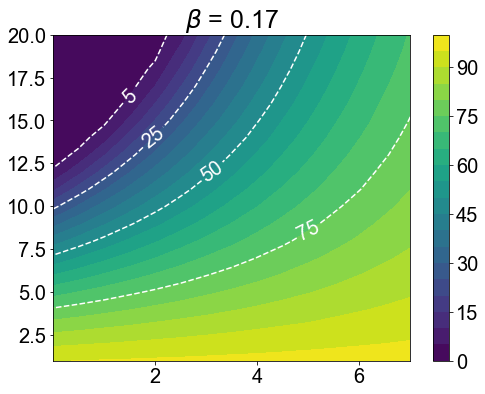

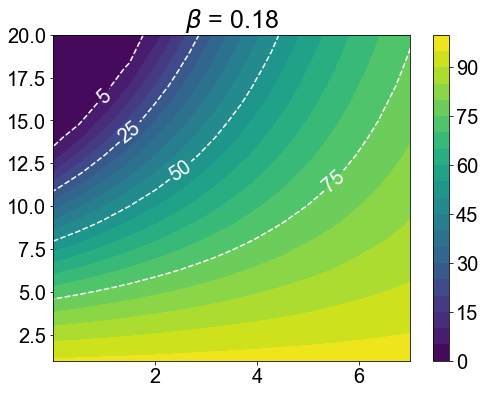

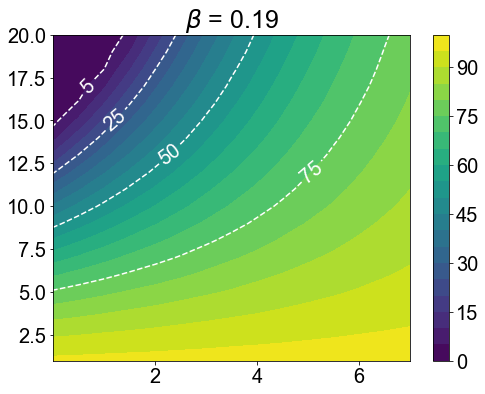

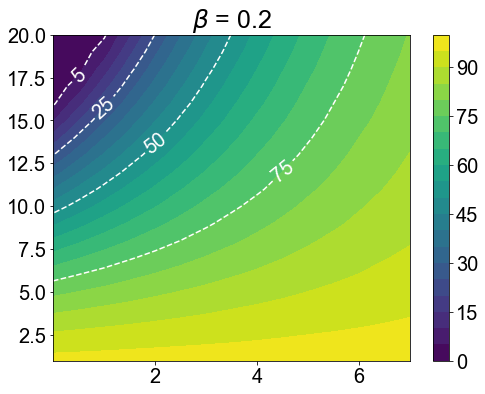

In [22]:
levels = np.arange(0,105,5)
levelcourves = [5,25,50,75]
n = 2


for k in range(int(len(beta)/2)):    
    cp = plt.contourf(tT_Q,np.array(k_Ex)*100/population,totinfected[:,:,2*k].transpose(),levels)     
    for l in levelcourves:
        cp2 = plt.contour(tT_Q,np.array(k_Ex)*100/population,totinfected[:,:,2*k].transpose(),[0,l,100],colors='white',linestyles='dashed')
        plt.clabel(cp2, inline=1, fontsize=20,fmt=str(l))
    plt.title(r'$\beta$ = '+str(round(beta[k*2],2)),fontsize=25)
    plt.tick_params(labelsize=20)    
    cbar = plt.colorbar(cp) # increase fontsize
    cbar.ax.tick_params(labelsize=20)
    # To save uncomment following line
    #plt.savefig('plot_'+str(k)+'.pdf',dpi=100,format='pdf')
    plt.show()    



## Paper Figure 5: Panel F
**Reducing the time of results delivery while increasing the rate of testing reduces the total number of infected individuals.** (Panel F) Suppression of total infected individuals according to the percentage of daily test applied and the delay in the delivery of results. Each plotted curve corresponds to the S95 contours of the simulations with the infectivity parameters used for panels A to E. As the effective transmission rate and the delay in the delivery of results increase, the percentage of daily tests required to maintain the 95% limit, increases.

In [23]:
saveplot = False

In [24]:
plt.rcParams["figure.figsize"] = 8,6#38.40, 20.56
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "sans-serif",
    "font.sans-serif":["Arial"]})

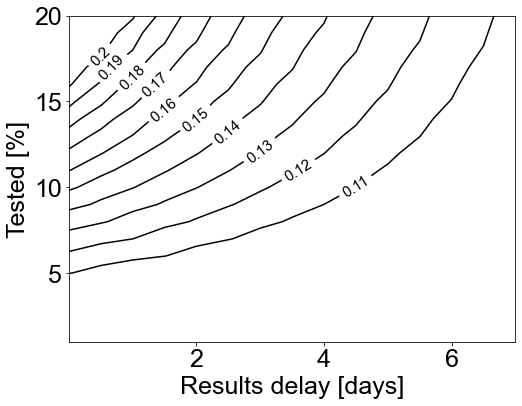

In [27]:
color = False # For colorizing level curves

levels = [0,5,100]
colors = plt.cm.jet(np.linspace(0,1,int(len(beta)/2)))

n = 3
fig,ax=plt.subplots(1,1)
ax.set_xlabel('Results delay [days]',size=25)
ax.set_ylabel('Tested [%]',size=25)  
ax.tick_params(labelsize=25)
for k in range(int(len(beta)/2)):
    if color:
        cp = ax.contour(tT_Q,np.array(k_Ex)*100/population,totinfected[:,:,2*k].transpose(),levels,colors=colors[k]) 
    else:
        cp = ax.contour(tT_Q,np.array(k_Ex)*100/population,totinfected[:,:,2*k].transpose(),levels,colors='black') 
        #cp = ax.contourf(T_T,examrate*100/population,beta)         # Agregar gradiente de beta
    ax.clabel(cp, inline=1, fontsize=15,fmt=str(round(beta[2*k],2)))

if saveplot:
    if color:
        plt.savefig('plotContourBeta_color.pdf',dpi=100,format='pdf')
    else:
        plt.savefig('plotContourBeta_byn.pdf',dpi=100,format='pdf')
plt.show()